In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score 
from sklearn.model_selection import cross_val_score 
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

In [14]:
#read the data
data = pd.read_csv("term-deposit-marketing-2020.csv")
label_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y']
le = LabelEncoder()
for col in label_columns:
    data[col] = le.fit_transform(data[col])

print("First five rows after label encoding:")
print(data.head().to_string(index=False))

First five rows after label encoding:
 age  job  marital  education  default  balance  housing  loan  contact  day  month  duration  campaign  y
  39    4        1          2        0     3023        1     0        2    4      8       261         0  0
  25    9        2          1        0      945        1     0        2    4      8       151         0  0
  14    2        1          1        0      918        1     1        2    4      8        76         0  0
  28    1        1          3        0     2420        1     0        2    4      8        92         0  0
  14   11        2          3        0      917        0     0        2    4      8       198         0  0


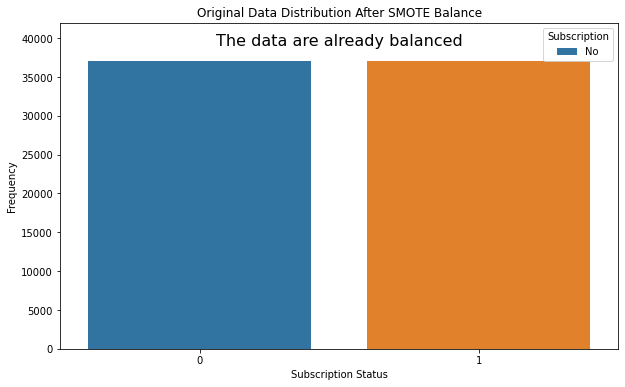

In [15]:
# Class balancing
x = data.drop("y", axis=1)
y = data['y']
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_resampled)
plt.title("Original Data Distribution After SMOTE Balance")
plt.xlabel("Subscription Status")
plt.ylabel("Frequency")
plt.ylim(0, 42000)
plt.legend(title="Subscription", labels=['No','Yes'])
plt.text(0.5, 39000, "The data are already balanced", fontsize='16', ha='center')
plt.show()

In [16]:
#data scaling 
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.20, random_state= 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [17]:
#RandomForestClassifier Algorthm
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


In [18]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.9520588820370002


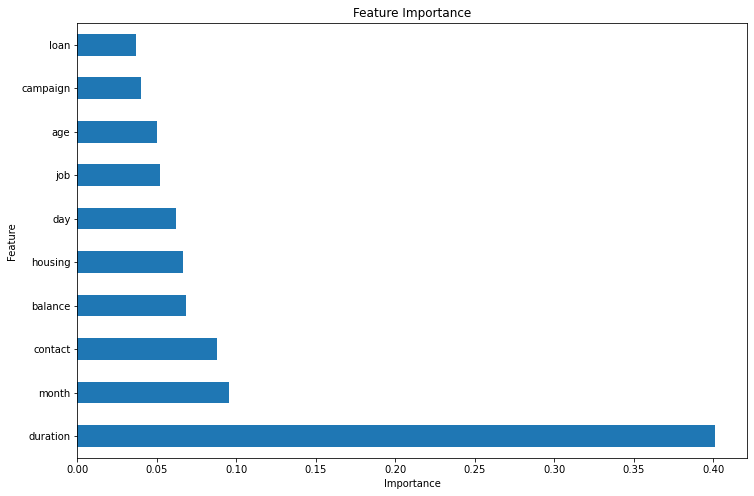

In [19]:
plt.figure(figsize=(12, 8))
feature_importances = pd.Series(clf.feature_importances_, index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [20]:
# Making a copy of train and test data
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

# Data Scaling on selected features
selected_features = ['age', 'job', 'education', 'balance', 'duration']
scaler = StandardScaler()
x_train_copy[selected_features] = scaler.fit_transform(x_train_copy[selected_features])
x_test_copy[selected_features] = scaler.transform(x_test_copy[selected_features])

# RandomForestClassifier Algorithm on scaled data
clf_scaled = RandomForestClassifier(random_state=42)
clf_scaled.fit(x_train_copy, y_train)
y_pred_scaled = clf_scaled.predict(x_test_copy)

# Compute F1 Score on scaled data
f1_scaled = f1_score(y_test, y_pred_scaled)
print(f"F1 Score with selected feature scaling: {f1_scaled}")




F1 Score with selected feature scaling: 0.952330438241729


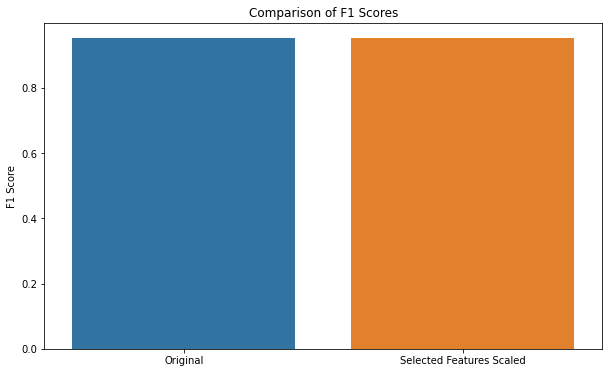

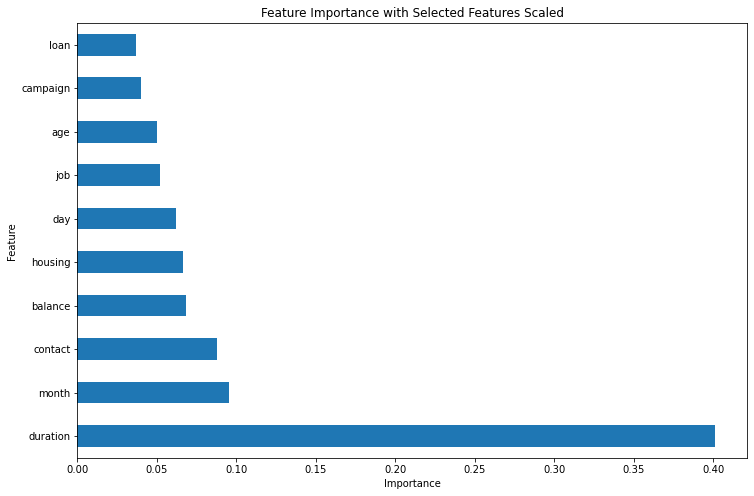

In [33]:
# Plotting F1 scores before and after scaling selected features
plt.figure(figsize=(10, 6))
f1_scores = [f1, f1_scaled]
labels = ['Original', 'Selected Features Scaled']
sns.barplot(x=labels, y=f1_scores)
plt.title("Comparison of F1 Scores")
plt.ylabel("F1 Score")
plt.show()

# Plotting Feature Importances for scaled model
plt.figure(figsize=(12, 8))
feature_importances_scaled = pd.Series(clf_scaled.feature_importances_, index=x.columns)
feature_importances_scaled.nlargest(10).plot(kind='barh')
plt.title('Feature Importance with Selected Features Scaled')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

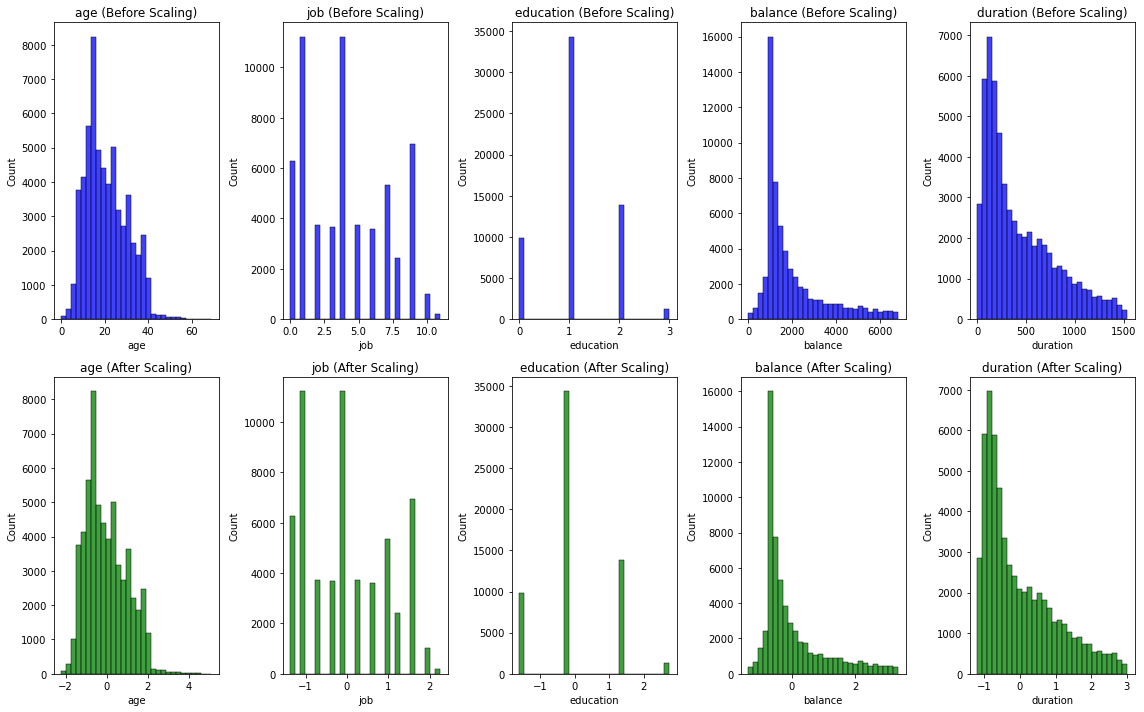

In [21]:
# Plotting selected features before scaling
plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, len(selected_features), i)
    sns.histplot(x_train[feature], bins=30, color='blue')
    plt.title(f"{feature} (Before Scaling)")
    
# Plotting selected features after scaling
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, len(selected_features), len(selected_features) + i)
    sns.histplot(x_train_copy[feature], bins=30, color='green')
    plt.title(f"{feature} (After Scaling)")

plt.tight_layout()
plt.show()


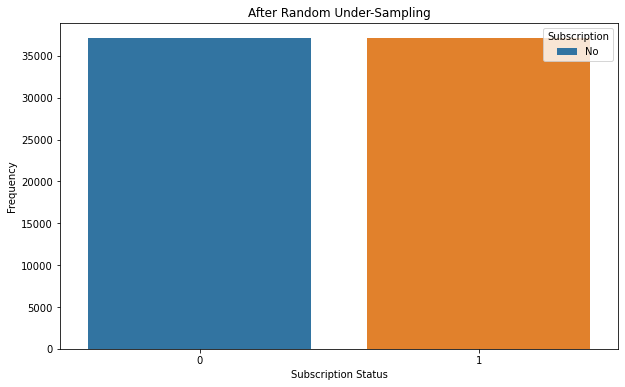

In [23]:
# Random Under-sampling after SMOTE
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x_resampled, y_resampled)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_resampled)
plt.title("After Random Under-Sampling")
plt.xlabel("Subscription Status")
plt.ylabel("Frequency")
plt.legend(title="Subscription", labels=['No','Yes'])
plt.show()

In [26]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [10, 50],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
f1_best_rf = f1_score(y_test, y_pred)
print(f"Optimized Random Forest F1 Score: {f1_best_rf}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Python apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python apps\Anaconda\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Python apps\Anaconda\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Python apps\Anaconda\lib\site-packages\sklea

Optimized Random Forest F1 Score: 0.9521220159151192


In [27]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost F1 Score: {f1_xgb}")


XGBoost F1 Score: 0.9505439498097844


In [28]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
f1_logreg = f1_score(y_test, y_pred_logreg)
print(f"Logistic Regression F1 Score: {f1_logreg}")


Logistic Regression F1 Score: 0.8623555645651734
